<a href="https://colab.research.google.com/github/XiaoPeng-Zhang/Feature-Engineering-Made-Easy-Note/blob/master/Chapter02/Chapter02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#特征理解：我的数据集里有什么
## 结构化数据与非结构化化数据
- 结构化数据：可以分成观察值和特征的数据，一般以表格的形式组织
- 非结构化数据：作为自由流动的实体，不遵循标准组织结构的数据。通常，非结构化数据在我们看来是一团数据，或只有一个特征
## 定量数据与定性数据
- 定量数据一般是数值，应该是衡量某样东西的数量
- 定性数据本质上是类别，应该是描述某样东西的性质
## 数据的4个等级
- 定类等级：只按名称分类，例如血型、人名和动物物种等
- 定序等级：可以自然排序。可以认为列中的某些数据比其他数据更好或更大
- 定距等级：数据不仅可以像定序等级的数据一样排序，而且值之间的差异也有意义。也就意味着不仅可以排序和比较，而且可以加减。
- 定比等级：处理的数据也是定量数据，不仅可以加减运算，还有乘除运算，而且还有绝对零点的概念。
## 探索性数据分析和数据可视化
## 描述性统计


In [0]:
#定量数据和定性数据
import pandas as pd #存储表格数据
import numpy as np #数学计算包
import matplotlib.pyplot as plt#流行的数据可视化包
import seaborn as sns#另一个流行的数据可视化包
#允许行内渲染图形
%matplotlib inline
plt.style.use('fivethirtyeight')#流行的数据可视化主题

In [43]:

salary_ranges=pd.read_csv('/content/Salary_Ranges_by_Job_Classification.csv')
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [0]:
salary_ranges.info()#查看数据有多少行，是否有缺失值，以及各列的数据类型
print('--------------------------------------------------------------------')
salary_ranges.isnull().sum()#另一种计算缺失值数量的方法

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null object
Biweekly Low Rate     1356 non-null object
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB
--------------------------------------------------------------------


SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [0]:
#print('--------------------------------------------------------------------')
salary_ranges.describe()#显示描述性统计


,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [0]:
salary_ranges_clo=salary_ranges[['Biweekly High Rate','Grade']]
salary_ranges_clo.head()
#移除工资前的美元符号，处理定量数据时，最好是用浮点型，定性数据则一般使用字符串或Unicode对象
salary_ranges_clo['Biweekly High Rate'].describe()
salary_ranges_clo['Biweekly High Rate']=salary_ranges_clo['Biweekly High Rate'].map(lambda value:value.replace('$',''))
salary_ranges_clo['Biweekly High Rate']=salary_ranges_clo['Biweekly High Rate'].astype(float)

salary_ranges_clo['Grade']=salary_ranges_clo['Grade'].astype(str)
#salary_ranges_clo.info()
salary_ranges_clo.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

,Biweekly High Rate,Grade
0,0.0,00000
1,15.0,00000
2,25.0,00000
3,50.0,00000
4,100.0,00000


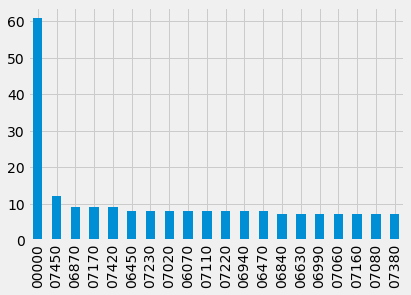

In [0]:
#定类等级：不能执行任何定量的数学操作，因为没有意义
salary_ranges['Grade'].value_counts().head()#用来计数
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')


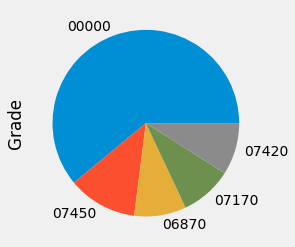

In [0]:
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')

In [0]:
#定序等级 
customer=pd.read_csv('/content/2013_SFO_Customer_survey.csv')
customer.head()
#customer.shape

,RESPNUM,CCGID,RUN,INTDATE,GATE,STRATA,PEAK,METHOD,AIRLINE,FLIGHT,DEST,DESTGEO,DESTMARK,ARRTIME,DEPTIME,Q2PURP1,Q2PURP2,Q2PURP3,Q2PURP4,Q2PURP5,Q2PURP6,Q3GETTO1,Q3GETTO2,Q3GETTO3,Q3GETTO4,Q3GETTO5,Q3GETTO6,Q3PARK,Q4BAGS,Q4BUY,Q4FOOD,Q4WIFI,Q5FLYPERYR,Q6TENURE,SAQ,Q7A_ART,Q7B_FOOD,Q7C_SHOPS,Q7D_SIGNS,Q7E_WALK,...,Q9C_CLNRENT,Q9D_CLNFOOD,Q9E_CLNBATH,Q9F_CLNWHOLE,Q9COM1,Q9COM2,Q9COM3,Q10SAFE,Q10COM1,Q10COM2,Q10COM3,Q11A_USEWEB,Q11B_USESFOAPP,Q11C_USEOTHAPP,Q11D_USESOCMED,Q11E_USEWIFI,Q12COM1,Q12COM2,Q12COM3,Q13_WHEREDEPART,Q13_RATEGETTO,Q14A_FIND,Q14B_SECURITY,Q15_PROBLEMS,Q15COM1,Q15COM2,Q15COM3,Q16_REGION,Q17_CITY,Q17_ZIP,Q17_COUNTRY,HOME,Q18_AGE,Q19_SEX,Q20_INCOME,Q21_HIFLYER,Q22A_USESJC,Q22B_USEOAK,LANG,WEIGHT
0,1,1,1215,2,12,1,1,1,21,1437,49,1,1,8:34 AM,9:25 AM,1,8.0,NaN,NaN,NaN,NaN,2,10.0,NaN,NaN,NaN,NaN,NaN,2,1,2,2,6,2.0,1,3,4,3,3,3,...,3,3,4,4,NaN,NaN,NaN,5,1.0,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,5,3,3,3,2,NaN,NaN,NaN,1,SAN FRANCISCO,94131.0,US,1,2,1,1,2,2,1,1,0.553675
1,2,2,1215,2,12,1,1,1,21,1437,49,1,1,8:00 AM,9:25 AM,1,8.0,NaN,NaN,NaN,NaN,2,10.0,NaN,NaN,NaN,NaN,NaN,2,2,2,2,6,4.0,1,4,4,4,4,4,...,6,4,4,4,NaN,NaN,NaN,5,1.0,NaN,NaN,2,2,2,2,3,NaN,NaN,NaN,2,3,5,5,2,NaN,NaN,NaN,1,CONCORD,94521.0,US,5,6,1,0,3,2,1,1,0.553675
2,3,3,1215,2,12,1,1,1,21,1437,49,1,1,7:00 AM,9:25 AM,1,8.0,NaN,NaN,NaN,NaN,2,10.0,NaN,NaN,NaN,NaN,NaN,2,2,2,2,4,4.0,1,3,4,4,2,4,...,3,3,3,3,NaN,NaN,NaN,3,1.0,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,5,3,3,3,2,NaN,NaN,NaN,1,SAN FRANCISCO,94134.0,US,1,4,2,2,3,2,2,1,0.553675
3,4,4,1215,2,12,1,1,1,21,1437,49,1,1,7:30 AM,9:25 AM,1,8.0,NaN,NaN,NaN,NaN,1,10.0,NaN,NaN,NaN,NaN,1.0,1,2,1,2,3,4.0,2,3,3,3,4,4,...,5,5,5,5,NaN,NaN,NaN,5,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,5,3,5,5,2,NaN,NaN,NaN,1,NaN,NaN,US,90,4,1,2,2,2,2,1,0.553675
4,5,5,1215,2,12,1,1,1,21,1437,49,1,1,6:30 AM,9:25 AM,1,8.0,NaN,NaN,NaN,NaN,8,10.0,NaN,NaN,NaN,NaN,NaN,2,1,1,1,2,3.0,2,3,3,2,3,5,...,5,5,5,5,87.0,NaN,NaN,5,5.0,NaN,NaN,2,2,2,2,1,1.0,5.0,NaN,3,5,4,3,2,NaN,NaN,NaN,3,HUNTINGTON BEACH,92646.0,US,10,3,1,3,1,0,1,1,0.553675


In [0]:
art_rating=customer['Q7A_ART']
art_rating.describe()

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

In [0]:
art_rating=art_rating[(art_rating>0)&(art_rating<6)]
art_rating=art_rating.astype(str)
art_rating.describe()


count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

In [0]:

art_rating.value_counts()

4    1066
5     803
3     696
2      71
1      20
Name: Q7A_ART, dtype: int64

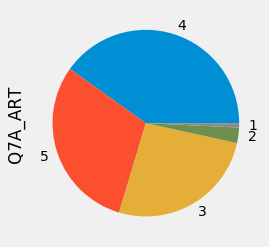

In [0]:

art_rating.value_counts().plot(kind='pie')

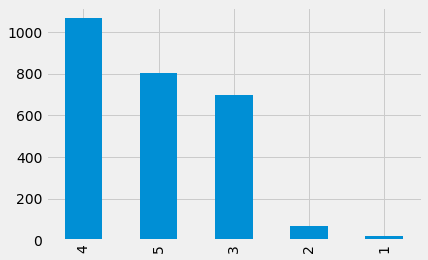

In [0]:

art_rating.value_counts().plot(kind='bar')

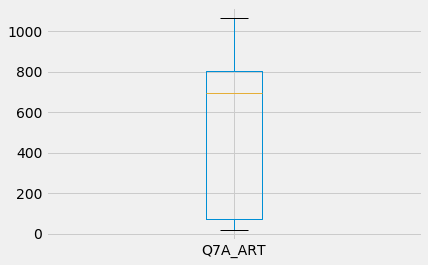

In [0]:
art_rating.value_counts().plot(kind='box')

In [16]:
#定距等级
climate=pd.read_csv('/content/GlobalLandTemperaturesByCity.csv')
climate.head()

#climate.shape

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [17]:
#查看缺失值
#climate.isnull().sum()
#清除缺失值
climate.dropna(axis=0,inplace=True)
#查看缺失值
climate.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [7]:
#查看独特值
climate['AverageTemperature'].nunique()

111994

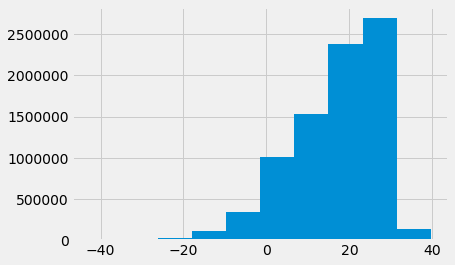

In [8]:
climate['AverageTemperature'].hist()#直方图

In [11]:
climate['AverageTemperature'].describe()

count    8.235082e+06
mean     1.672743e+01
std      1.035344e+01
min     -4.270400e+01
25%      1.029900e+01
50%      1.883100e+01
75%      2.521000e+01
max      3.965100e+01
Name: AverageTemperature, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc13b1a6438>,
      dtype=object)

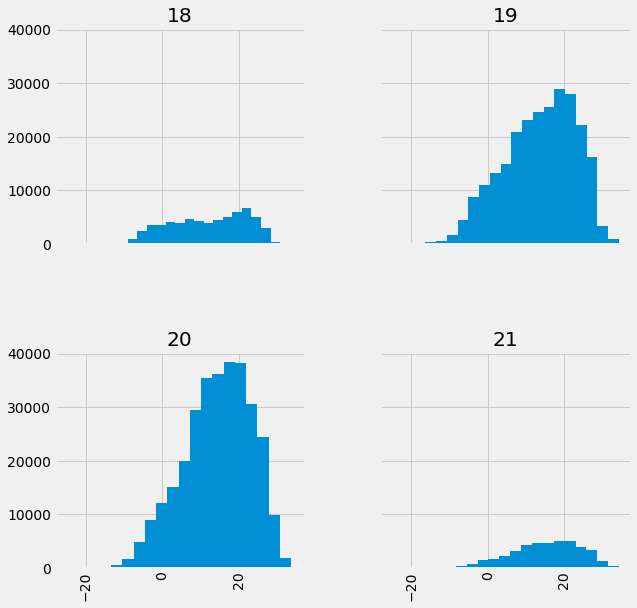

In [19]:
#将DT转换为日期，取年份
climate['dt']=pd.to_datetime(climate['dt'])
climate['year']=climate['dt'].map(lambda value:value.year)

#只看美国
climate_sub_us=climate.loc[climate['Country']=='United States']
climate_sub_us['century']=climate_sub_us['year'].map(lambda value:int(value/100+1))
climate_sub_us['AverageTemperature'].hist(by=climate_sub_us['century'],sharex=True,sharey=True,figsize=(10,10),bins=20)

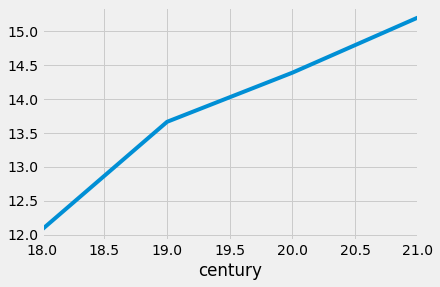

In [20]:
climate_sub_us.groupby('century')['AverageTemperature'].mean().plot(kind='line')

In [21]:
century_change=climate_sub_us.groupby('century')['AverageTemperature'].mean()
century_change

century
18    12.073243
19    13.662870
20    14.386622
21    15.197692
Name: AverageTemperature, dtype: float64

In [22]:
century_change[21]-century_change[18]

3.124449115460754

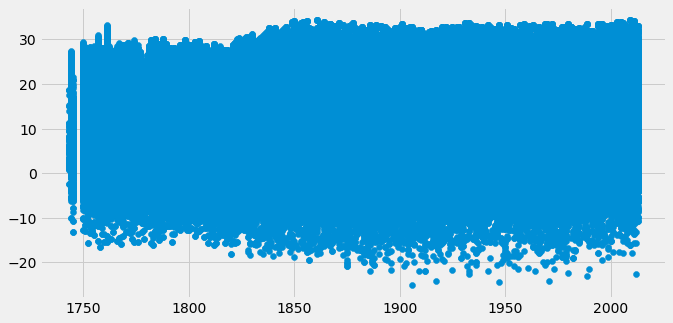

In [24]:
x=climate_sub_us['year']
y=climate_sub_us['AverageTemperature']
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(x,y)
plt.show()

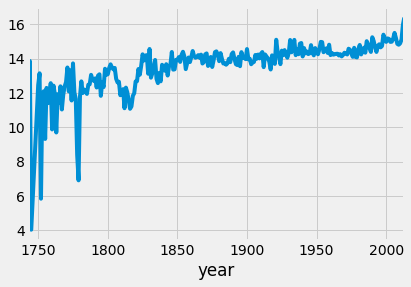

In [25]:
climate_sub_us.groupby('year')['AverageTemperature'].mean().plot()

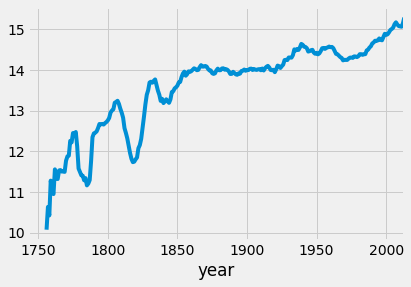

In [30]:
climate_sub_us.groupby('year')['AverageTemperature'].mean().rolling(10).mean().plot()

In [32]:
#定比数据
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [0]:
salary_ranges['Biweekly High Rate']=salary_ranges['Biweekly High Rate'].map(lambda value:value.replace('$',''))
salary_ranges['Biweekly High Rate']=salary_ranges['Biweekly High Rate'].astype(float)


In [45]:
salary_ranges['Biweekly High Rate'].describe()

count     1356.000000
mean      3161.727021
std       1481.002904
min          0.000000
25%       2145.000000
50%       2856.500000
75%       3703.000000
max      12120.770000
Name: Biweekly High Rate, dtype: float64

Text(0.5, 1.0, 'T0p 20')

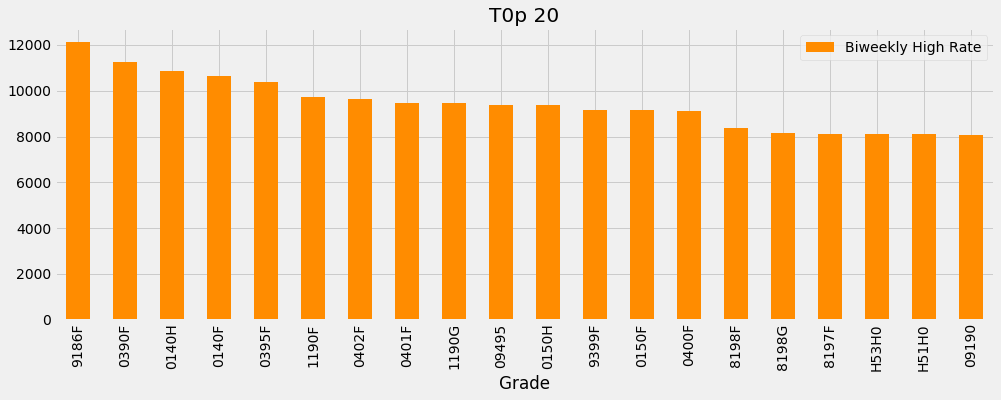

In [49]:
fig=plt.figure(figsize=(15,5))
ax=fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values('Biweekly High Rate',ascending=False).head(20).plot.bar(stacked=False,ax=ax,color='darkorange')
ax.set_title('T0p 20')

Text(0.5, 1.0, 'tail 20')

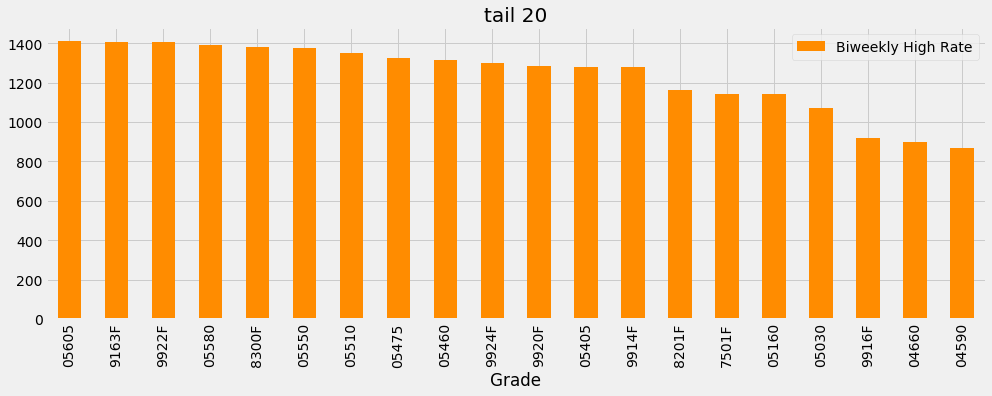

In [51]:
fig=plt.figure(figsize=(15,5))
ax=fig.gca()
salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values('Biweekly High Rate',ascending=False).tail(20).plot.bar(stacked=False,ax=ax,color='darkorange')
ax.set_title('tail 20')

In [52]:
sort_df=salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values('Biweekly High Rate',ascending=False)
sort_df.iloc[0][0]/sort_df.iloc[-1][0]

13.931919540229886